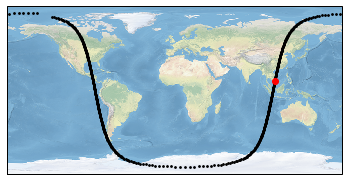

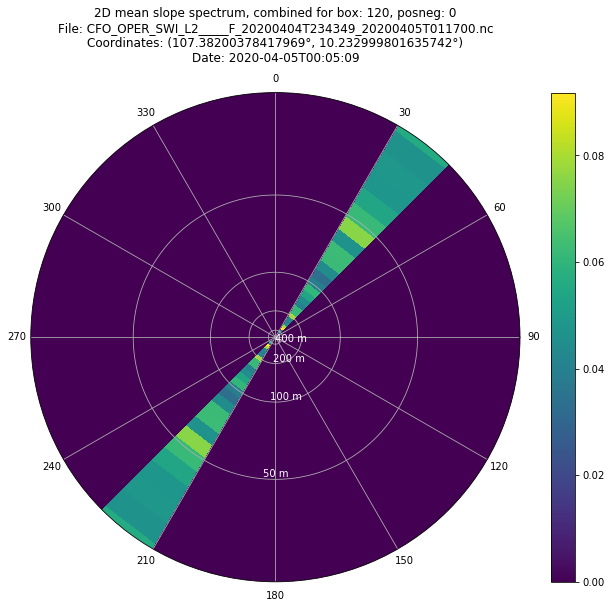

In [6]:
#SWIM 2D WAVE spectra visualization notebook
#:author: C. Tourain
#:creation date : 08-11-2019

#This program is free software: you can redistribute it and/or modify it
#under the terms of the GNU Lesser General Public License as published by
#the Free Software Foundation, either version 3 of the License,
#or (at your option) any later version.

#This program is distributed in the hope that it will be useful,
#but WITHOUT ANY WARRANTY; without even the implied warranty of
#MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU Lesser
#General Public License for more details (http://www.gnu.org/licenses/).
#"""

########## warning : needs python with cartopy package  ##################

from math import pi
import numpy as np
import netCDF4 as netcdf
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import sys
sys.path.append('../src')
import plot_spectre_2D
%matplotlib inline

############################################################# arguments initilization :##########################################################
#SWIM L2 NetCDF file full path
SWIM_L2_NC_file_path='/home/qt/tourainc/pour_hand_book/'
#SWIM L2 NetCDF file full name
SWIM_L2_NC_file_name='CFO_OPER_SWI_L2_____F_20200404T234349_20200405T011700.nc'

#SWIM box number for wave spectra visualization
num_box=120

#side of the nadir track to analyse (0 : right sides ; 1 :left side) conda env create -n cfosat_lab -f environment.yml

nadir_side=0

#beam choice for spectra : 6=> beam 6°; 8=> beam 8°; 10=> beam 10° ; 0 => combined (combination of the 3 beams)
beam=0

#partitions visualization : True => partitions plotted; False => partitions not plotted
partitions=False

#color bar min and max values ('None' recommended)
vmin, vmax = None, None

#wave wavelength visualization range:
#min wavelength (m), instrument specification :70m
min_wavelength=30
#max wavelength (m), instrument specification :500m
max_wavelength=600 



####################################################### ground track and box position visualization #############################################

#NetCDF file opening and reading
cdf=netcdf.Dataset(SWIM_L2_NC_file_path+SWIM_L2_NC_file_name)

# Plot the nadir point for all boxes along the satellite track (Black points)
# plot the selected box localization (red point)

try:
    lat = cdf.variables['lat_nadir_l2'][:]
    lon = cdf.variables['lon_nadir_l2'][:]
except Exception:
    self.logger.error('Nadir coordinates of boxes unavailable. Using lon_l2, lat_l2 for posneg=0 to plot trace instead.')
finally:
    lat = cdf.variables['lat_l2'][0,:]
    lon = cdf.variables['lon_l2'][0,:]
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())  
ax.stock_img()
ax.set_global()      
ax.scatter(lon, lat, s=3, c='k', marker='o')          
h = ax.plot(lon[num_box],lat[num_box],marker='o', c='r')


################################################################### 2D Spectrum visualization ######################################################

# Partitions wave parameters initialization
swh_part = cdf.variables['wave_param_part'][0,:,nadir_side,num_box,int((beam-6)/2)]
dom_wl = cdf.variables['wave_param_part'][1,:,nadir_side,num_box,int((beam-6)/2)]
dom_azi = cdf.variables['wave_param_part'][2,:,nadir_side,num_box,int((beam-6)/2)]

swh_part_comb = cdf.variables['wave_param_part_combined'][0,:,nadir_side,num_box]
dom_wl_comb = cdf.variables['wave_param_part_combined'][1,:,nadir_side,num_box]
dom_azi_comb = cdf.variables['wave_param_part_combined'][2,:,nadir_side,num_box]


#plot the SWIM 2D wave spectra for the selected box 
fig=plot_spectre_2D.plotSpectrum(num_box,nadir_side,beam,SWIM_L2_NC_file_path,SWIM_L2_NC_file_name,min_wavelength,max_wavelength,vmin,vmax,partitions)

# partitions and associated paramaters visualization (if selected)
if partitions==True:
    columns = ('partition','SWH(m)','wavelenth(m)','direction (°)')
    # for combination of the 3 beams
    if beam == 0 :
        cell_text= [['1',str(swh_part_comb[0]),str(dom_wl_comb[0]),str(dom_azi_comb[0])],
                    ['2',str(swh_part_comb[1]),str(dom_wl_comb[1]),str(dom_azi_comb[1])],
                    ['3',str(swh_part_comb[2]),str(dom_wl_comb[2]),str(dom_azi_comb[2])]]
    # for one selected beam            
    else :
        cell_text= [['1',str(swh_part[0]),str(dom_wl[0]),str(dom_azi[0])],
                    ['2',str(swh_part[1]),str(dom_wl[1]),str(dom_azi[1])],
                    ['3',str(swh_part[2]),str(dom_wl[2]),str(dom_azi[2])]]
        
    plt.table(cellText=cell_text,colLabels=columns,loc='bottom',colWidths=[0.1,0.3,0.3,0.3])
